In [71]:
# Trambaiollo Luca  0001103540 luca.trambaiollo@studio.unibo.it

In [72]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, f1_score

# Variables
file_name = 'ML-Python-Lab-Data.csv'
separator = ','
random_state = 42

# Directives
%matplotlib inline

1. Load the data file and explore the data, showing size, data descriptions,
data distributions with boxplot, pairplots

In [73]:
names = ['Index',
'Sex',
'Length',
'Diameter',
'Height',
'Whole weight',
'Shucked weight',
'Viscera weight',
'Shell weight',
'Rings']
# Loading the data.
df = pd.read_csv(file_name, header = None, sep=separator, names = names)

In [74]:
#  Printing the size of df.
print("Number of rows: {}, number of columns: {}".format(df.shape[0], df.shape[1]))

Number of rows: 4177, number of columns: 10


In [75]:
# Printing the head of df.
df.head(20)

,Index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2.0
1,1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0
2,2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1.0
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0
5,5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0.0
6,6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,3.0
7,7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,2.0
8,8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,1.0
9,9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,3.0


In [76]:
#Checking which columns contain numerical data and which contain categorical data.
df.dtypes

Index               int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings             float64
dtype: object

In [77]:
df.describe()

,Index,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,3997.000000,3976.000000,3987.000000,3990.000000,3983.000000,4002.000000,3990.000000,4177.000000
mean,2088.000000,0.525330,0.408448,0.139669,0.830577,0.360681,0.180995,0.239796,0.861623
std,1205.940366,0.119569,0.098728,0.041988,0.490629,0.221100,0.109425,0.139765,0.762510
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,1044.000000,0.450000,0.350000,0.115000,0.444500,0.188000,0.094000,0.130000,0.000000
50%,2088.000000,0.545000,0.425000,0.140000,0.802250,0.339000,0.171500,0.235000,1.000000
75%,3132.000000,0.615000,0.480000,0.165000,1.154375,0.503250,0.253500,0.330000,1.000000
max,4176.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,3.000000


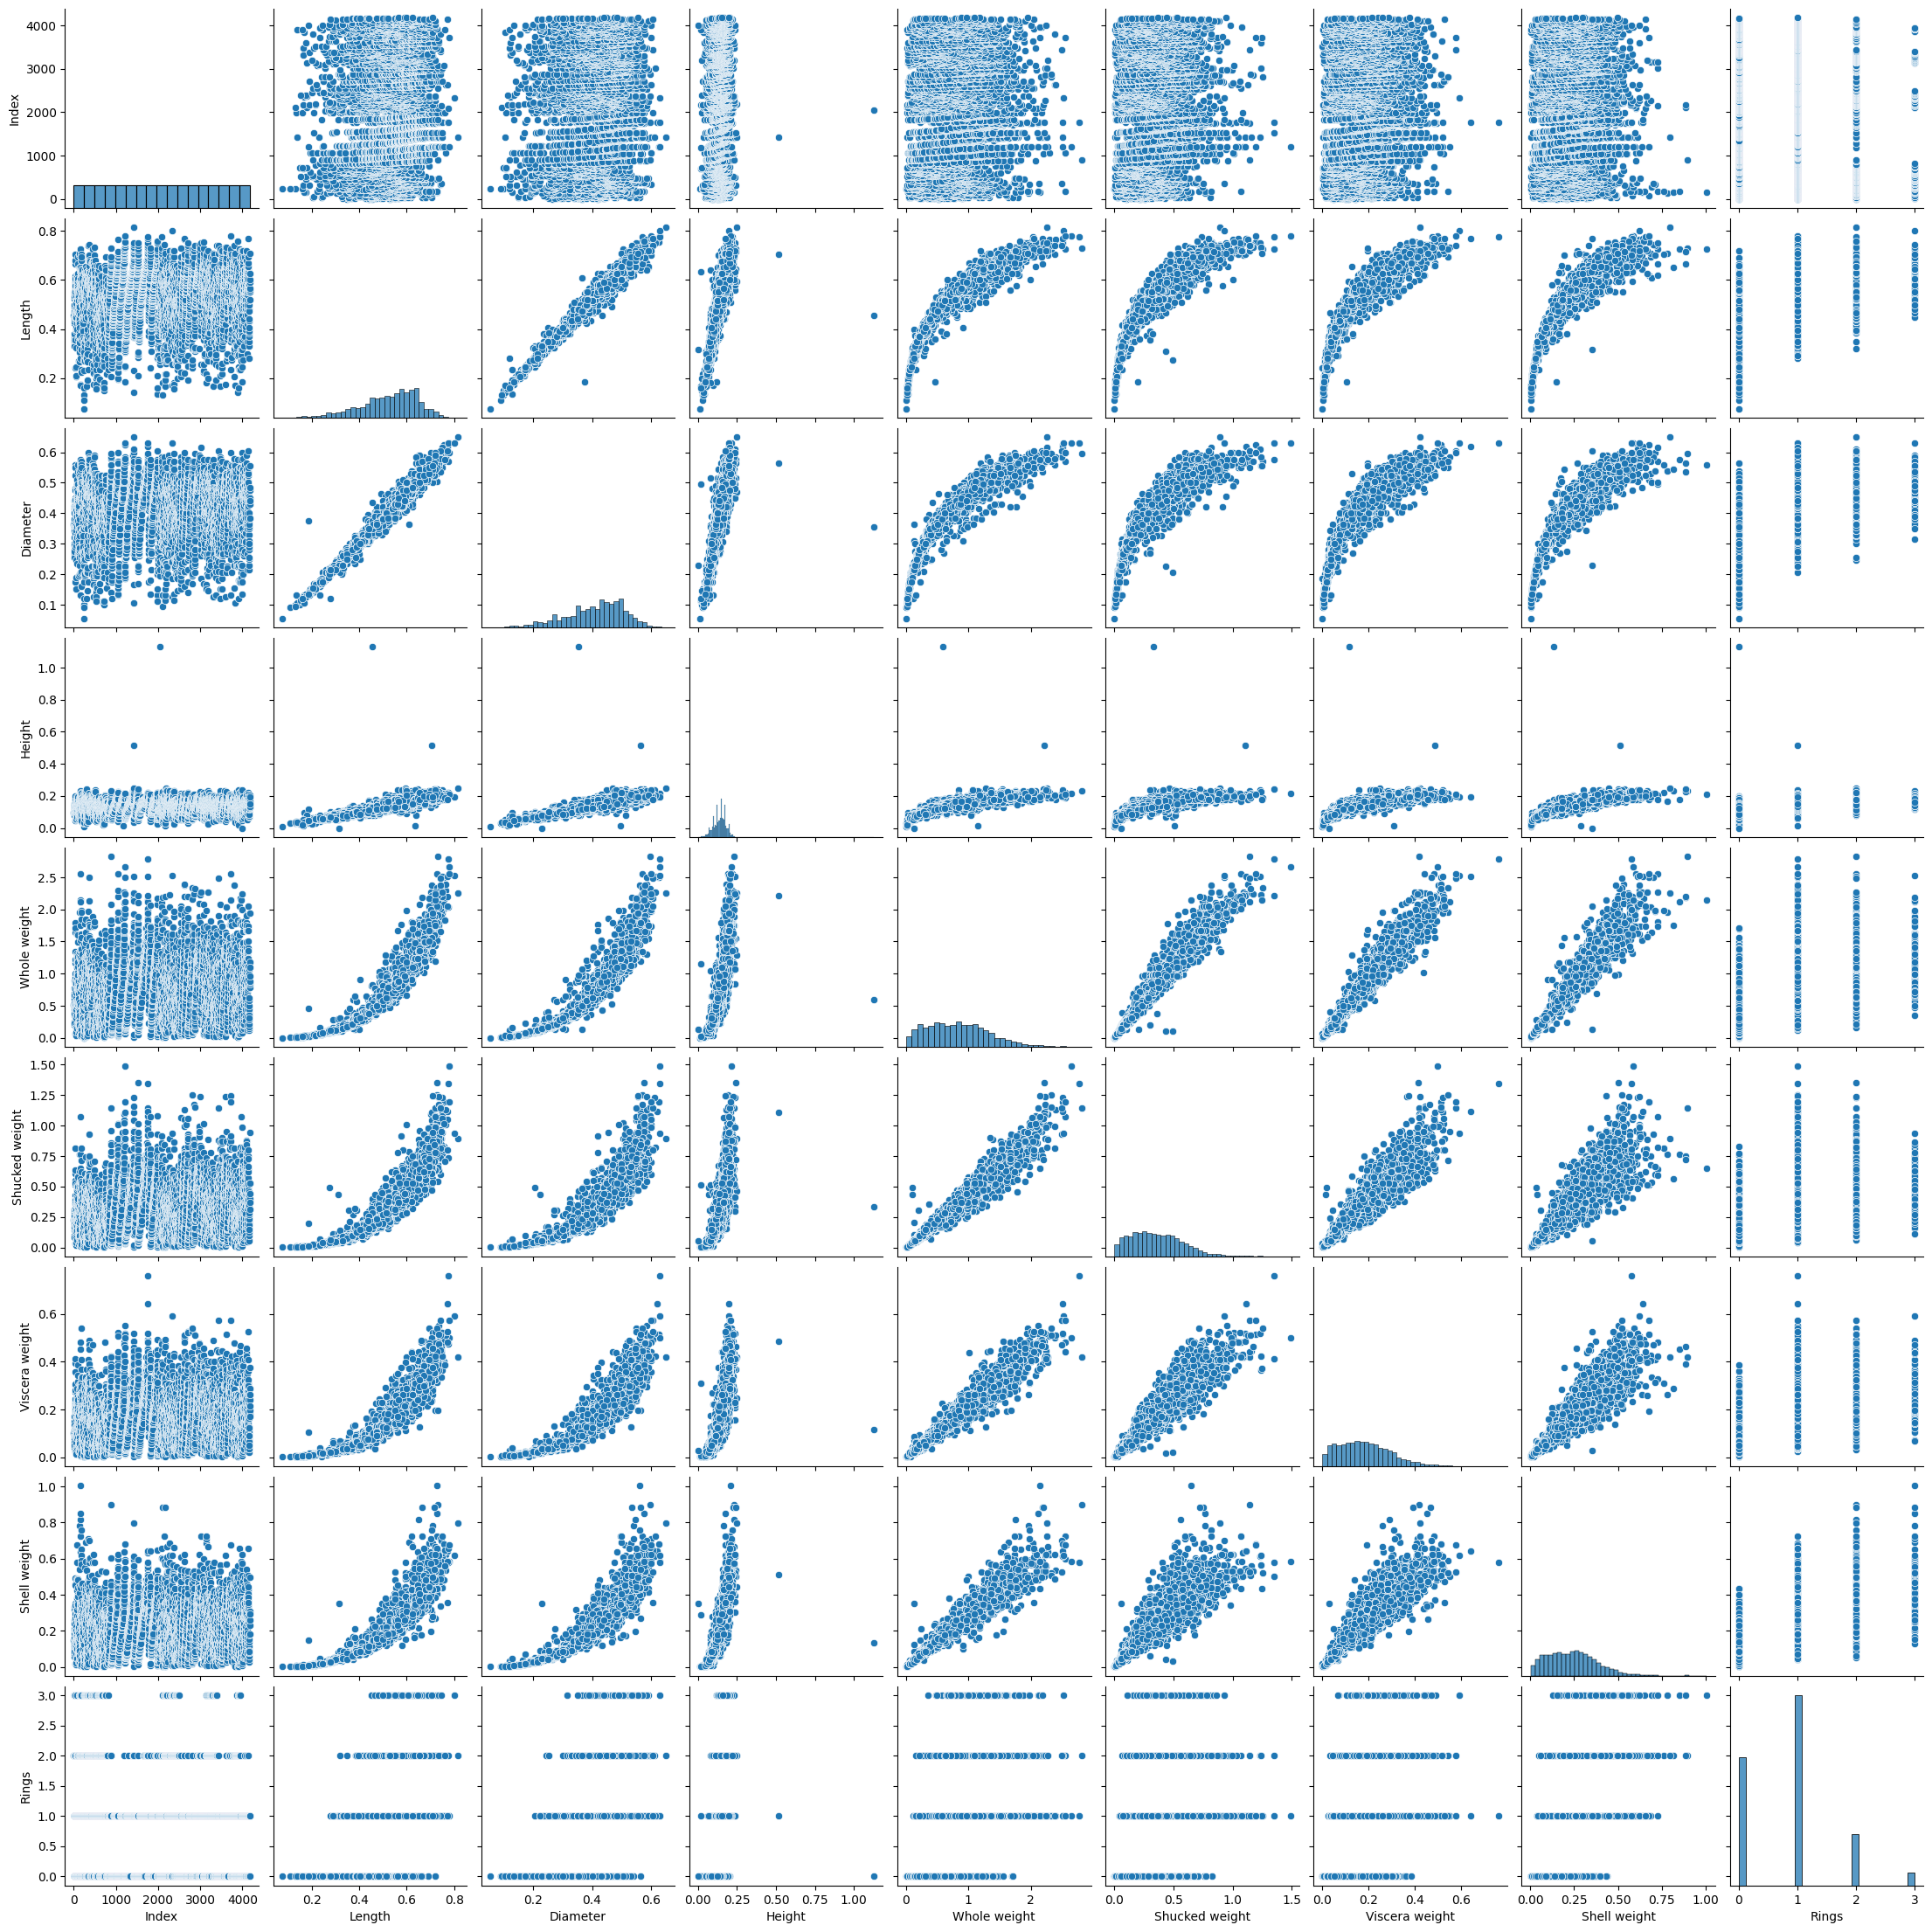

In [78]:
# Plotting the pairplot of numerical data.
sns.pairplot(df);

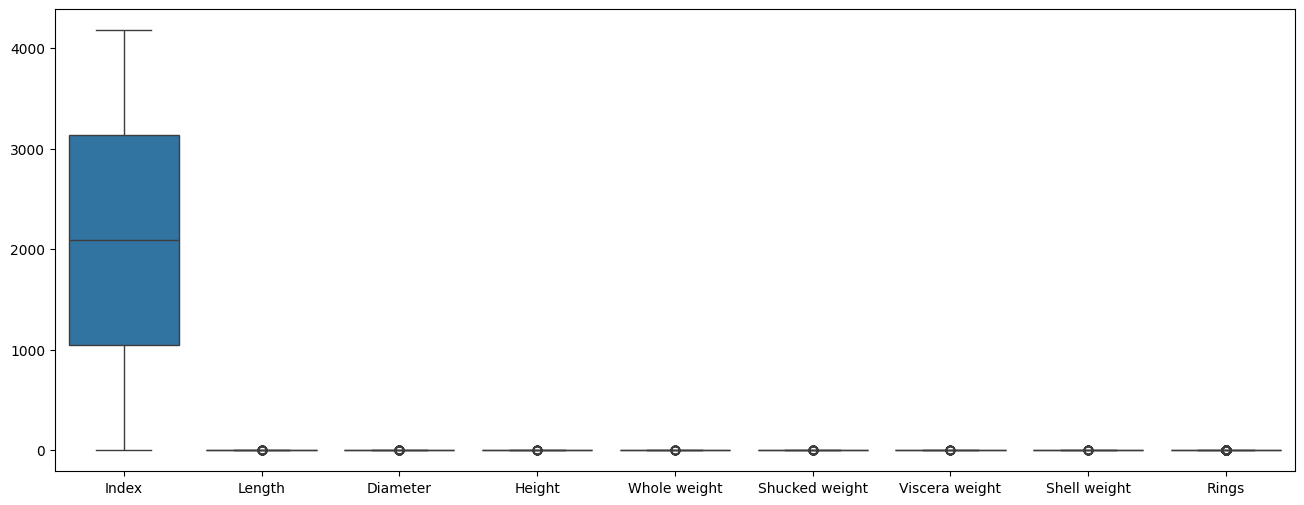

In [79]:
## Plotting the boxplot of numerical data.
plt.figure(figsize=(16, 6))
sns.boxplot(df);

2. Comment the exploration of step 1 pointing out if there are imbalanced distributions, outliers, missing values


In [80]:
# From the step one I can see that all the columns have numeric values excepts for sex attribute. 
# I can also look that there are some NaN values. The data has a fairly linear distribution and
# all the variables have some outliers as I can see from the boxplot below (that are the points not inside the main distribution).

3. Drop the columns that are not relevant for the classification operation, if any, and explain why you do that.

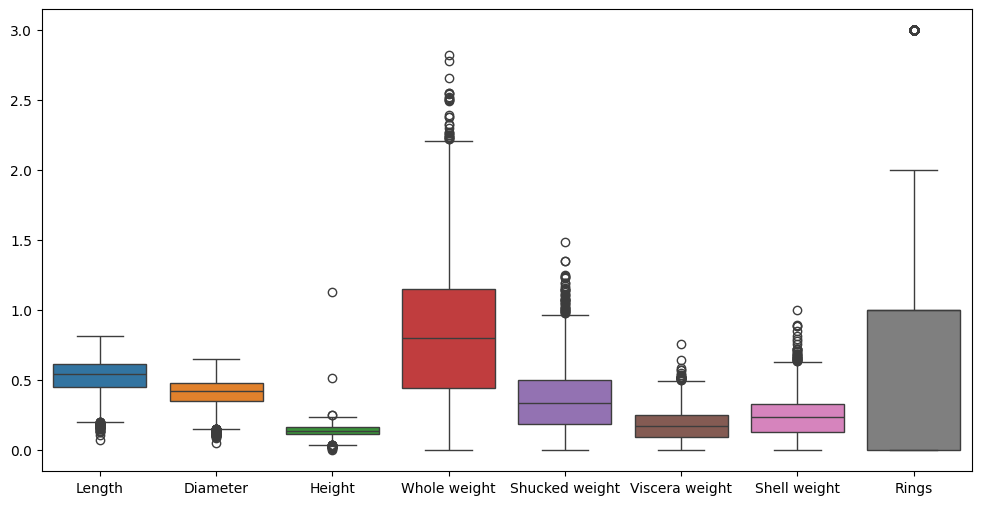

In [81]:
df = df.drop(columns=['Index']) #because is not useful to have an index column for the classification, it doesn't give any information
df = df.drop(columns=['Sex']) #because it is not a numeric attributes
plt.figure(figsize=(12, 6))
sns.boxplot(df);

In [82]:
#I drop all the rows with NaN values
if df.isnull().values.any():
# Removing rows with NaNs.
    df = df.dropna(axis = 0)
    # The shape of df is printed.
    print("Number of rows: {}, number of columns: {}".format(df.shape[0], df.shape[1]))

Number of rows: 3052, number of columns: 8


4. find the best classification scheme considering two classification methods, find the best hyperparameters using cross validation; the optimization must be focused on the f1_macro measure

In [83]:
# Defining the y vector.
y = df['Rings']

# Defining the X matrix.
X = df.drop(['Rings'], axis = 1)

# Splitting into training set and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state)
print("Xtrain shape: {}".format(X_train.shape))
print("Xtest shape: {}".format(X_test.shape))

Xtrain shape: (2289, 7)
Xtest shape: (763, 7)


MODEL 1: DECISION TREE


In [84]:
score = 'f1_macro' #optimize of f1_macro
cv = 5 #number of split for cross validation
model_param = {'criterion':['gini', 'entropy'], 'max_depth':list(range(1,10)), 'min_samples_split': range(2,10)}
model_est = DecisionTreeClassifier(random_state=random_state)

model = GridSearchCV(model_est, model_param, scoring=score, cv=5) 
model.fit(X_train,y_train);

MODEL 2: K-NEAREST NEIGHBORS

In [85]:
score = 'f1_macro' #optimize of f1_macro
cv = 5 #number of split for cross validation
model2_param = [{"n_neighbors": list(range(1, 16))}]
model2_est = KNeighborsClassifier()


model2 = GridSearchCV(model2_est, model2_param, scoring=score, cv=5) 
model2.fit(X_train,y_train);

5. Show the performance measures and the confusion matrices for the best hyperparameters of each model

MODEL 1

In [86]:
y_pred = model.predict(X_test)

print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred, normalize = 'true')))

Confusion matrix:
[[0.75342466 0.24200913 0.00456621 0.        ]
 [0.14754098 0.73497268 0.11748634 0.        ]
 [0.04081633 0.57142857 0.38095238 0.00680272]
 [0.         0.38709677 0.58064516 0.03225806]]


In [87]:
#printing the f1_macro score 
f1_model1 = f1_score(y_test, y_pred, average='macro')
print(f1_model1)

0.4781788257697961


MODEL 2


In [88]:
y_pred2 = model2.predict(X_test)

print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred2,normalize = 'true')))

Confusion matrix:
[[0.68493151 0.30136986 0.01369863 0.        ]
 [0.20765027 0.60928962 0.1557377  0.0273224 ]
 [0.08843537 0.46258503 0.40816327 0.04081633]
 [0.03225806 0.32258065 0.58064516 0.06451613]]


In [89]:
#printing the f1_macro score 
f1_model2 = f1_score(y_test, y_pred2, average='macro')
print(f1_model2)

0.4411846115148388


6. Comment the results

In [90]:
print(f'Comparison between model scores: the f1 score of model 1 is {f1_model1} and model 2 {f1_model2}.')

Comparison between model scores: the f1 score of model 1 is 0.4781788257697961 and model 2 0.4411846115148388.


Given the comparison of the results obtained via f1 scores the first model (i.e. the Decision Tree Classifier) has been selected.
In particular with an higher value of f1 score (i.e. an harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0) the Decision tree shows a slightly better result.
From the both confusion matrixes I can understand that the label 4 is classified very bad because the last value of the main diagonal is very low in both the models.